In [ ]:
!pip install yfinance matplotlib langchain openai


In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ""


In [13]:
!pip install groq
!pip install langchain-groq



In [22]:
import yfinance as yf

ticker = "AAPL"
stock = yf.Ticker(ticker)

try:
    data = stock.history(period="6mo", interval="1d")
    print(f"✅ Data fetched for {ticker}:")
    print(data.head())

    if data.empty:
        print("⚠️ No data found!")
    else:
        print("🎉 Data successfully retrieved!")
except Exception as e:
    print(f"🚨 Error fetching data: {e}")


✅ Data fetched for AAPL:
                                 Open        High         Low       Close  \
Date                                                                        
2024-08-28 00:00:00-04:00  227.419467  229.355209  225.184381  225.992615   
2024-08-29 00:00:00-04:00  229.594702  232.408501  228.377380  229.285370   
2024-08-30 00:00:00-04:00  229.684490  229.894020  226.980435  228.497101   
2024-09-03 00:00:00-04:00  228.048082  228.497091  220.684285  222.280777   
2024-09-04 00:00:00-04:00  221.173224  221.292956  217.002396  220.365005   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-08-28 00:00:00-04:00  38052200        0.0           0.0  
2024-08-29 00:00:00-04:00  51906300        0.0           0.0  
2024-08-30 00:00:00-04:00  52990800        0.0           0.0  
2024-09-03 00:00:00-04:00  50190600        0.0           0.0  
2024-09-04 00:00:00-04:00  43840200        0.0           



> Entering new AgentExecutor chain...
Action:
```
{
  "action": "Stock Market Tool",
  "action_input": {
    "ticker": "AAPL",
    "period": "3mo"
  }
}
```
🔍 Agent Input -> Ticker: AAPL, Period: 3mo
🛠️ Fetching stock data for AAPL (Period: 3mo)
✅ Data retrieved successfully!
                                 Open        High         Low       Close  \
Date                                                                        
2024-11-29 00:00:00-05:00  234.552115  237.548820  233.713041  237.069351   
2024-12-02 00:00:00-05:00  237.009414  240.525538  236.899535  239.326859   
2024-12-03 00:00:00-05:00  239.546622  242.493379  238.637618  242.383499   
2024-12-04 00:00:00-05:00  242.603257  243.841901  240.985041  242.743103   
2024-12-05 00:00:00-05:00  243.722040  244.271424  241.864082  242.773071   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-11-29 00:00:00-05:00  28481400        0.0         

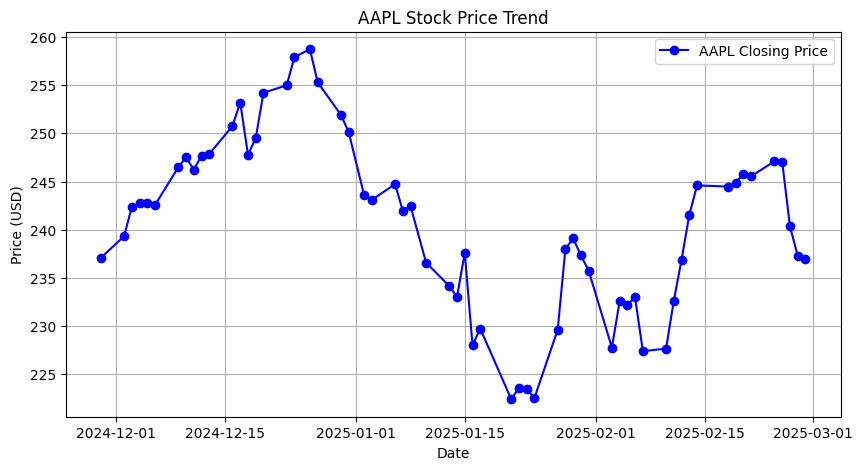


Observation: 📈 Stock data for AAPL displayed successfully.
Thought:Since the stock trend for AAPL in the last 3 months has already been displayed successfully, there's no need for further actions. The observation of the stock trend is already available.

Action:
```
{
  "action": "Final Answer",
  "action_input": "The stock trend for AAPL in the last 3 months has been displayed successfully."
}
```

> Finished chain.
{'input': 'Show me the stock trend for AAPL in the last 3 months.', 'output': 'The stock trend for AAPL in the last 3 months has been displayed successfully.'}


In [27]:
# Import necessary modules
import yfinance as yf
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
from langchain.agents import AgentType, initialize_agent
from langchain_groq import ChatGroq
from langchain.tools import StructuredTool
from pydantic import BaseModel

# Set up Groq API Key
os.environ["GROQ_API_KEY"] = "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"

# Function to fetch stock data
def fetch_stock_data(ticker: str, period: str = "3mo"):
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)

    print(f"🛠️ Fetching stock data for {ticker} (Period: {period})")
    if data.empty:
        print(f"⚠️ No stock data found for {ticker}.")
    else:
        print("✅ Data retrieved successfully!")
        print(data.head())

    return data

# Function to plot stock data
def plot_stock_data(data, ticker: str):
    if data.empty:
        print(f"⚠️ No data available for {ticker}, skipping plot.")
        return

    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data['Close'], label=f'{ticker} Closing Price', color='b', marker='o', linestyle='-')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'{ticker} Stock Price Trend')
    plt.legend()
    plt.grid()
    plt.show()

# Stock Tool Wrapper
def stock_tool(ticker: str, period: str = "3mo"):
    print(f"🔍 Agent Input -> Ticker: {ticker}, Period: {period}")
    data = fetch_stock_data(ticker, period)

    if data.empty:
        return f"⚠️ No stock data found for {ticker} in the last {period}."

    plot_stock_data(data, ticker)
    return f"📈 Stock data for {ticker} displayed successfully."

# Define structured tool input format
class StockToolInput(BaseModel):
    ticker: str
    period: str = "3mo"

# Create Structured Tool
tool = StructuredTool(
    name="Stock Market Tool",
    func=stock_tool,
    description="Fetches and plots stock market data for a given ticker and period.",
    args_schema=StockToolInput,
)

# Initialize Agent with Groq Llama-3.3-70B Versatile
llm = ChatGroq(model_name="llama-3.3-70b-versatile")

agent = initialize_agent(
    tools=[tool],
    llm=llm,
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,  # ✅ Fixed agent type
    verbose=True
)

# Example usage
# Example usage
if __name__ == "__main__":
    user_input = "Show me the stock trend for AAPL in the last 3 months."
    response = agent.invoke({"input": user_input})  # ✅ Fix: Use "input" as key
    print(response)

